In [1]:
import numpy as np
import os
import re
from collections import defaultdict

# Load instrument group mappings
instrument_groups_file = "instrument_groups.txt"
instrument_mapping = {}
with open(instrument_groups_file, "r") as f:
    for line in f:
        parts = line.strip().split()
        instrument_mapping[int(parts[0])] = parts[1]

# Load primary categories
primary_categories_file = "primary_categories_train.txt"
track_instruments = defaultdict(dict)
with open(primary_categories_file, "r") as f:
    current_track = None
    for line in f:
        line = line.strip()
        if line.startswith("Track: "):
            current_track = re.search(r"Track(\d+)", line).group(1)
        elif current_track and ".flac:" in line:
            parts = line.split(": ")
            track_instruments[current_track][parts[0]] = int(parts[1])

# Load timestamps
timestamps_file = "raw_timestamps_train.txt"
track_timestamps = defaultdict(lambda: defaultdict(list))
with open(timestamps_file, "r") as f:
    current_track = None
    for line in f:
        line = line.strip()
        if line.startswith("Track: "):
            current_track = re.search(r"Track(\d+)", line).group(1)
        elif current_track and ".flac:" in line:
            parts = line.split(": ")
            timestamps = eval(parts[1])  # Convert string representation of list to actual list
            track_timestamps[current_track][parts[0]] = timestamps

In [2]:
# Create output directory
output_dir = "primary_labels_train"
os.makedirs(output_dir, exist_ok=True)

# Process each track
for track_id in range(1, 1501):
    track_str = str(track_id).zfill(5)
    if track_str not in track_timestamps:
        continue  # Skip if no data for this track
    
    # Determine max time length in track
    max_time = 0
    for flac, intervals in track_timestamps[track_str].items():
        for start, end in intervals:
            max_time = max(max_time, int(end))
    
    # Initialize binary matrix
    instrument_matrix = np.zeros((17, max_time + 1), dtype=int)
    
    # Fill matrix with 1s where instruments are playing
    for flac, intervals in track_timestamps[track_str].items():
        if flac in track_instruments[track_str]:
            instrument_group = track_instruments[track_str][flac]
            for start, end in intervals:
                instrument_matrix[instrument_group, int(start):int(end) + 1] = 1
    
    # Save matrix to .npy file
    npy_filename = os.path.join(output_dir, f"Track{track_str}.npy")
    np.save(npy_filename, instrument_matrix)
    print(f"Processed and saved {npy_filename}")

Processed and saved primary_labels_train\Track00001.npy
Processed and saved primary_labels_train\Track00002.npy
Processed and saved primary_labels_train\Track00003.npy
Processed and saved primary_labels_train\Track00004.npy
Processed and saved primary_labels_train\Track00005.npy
Processed and saved primary_labels_train\Track00006.npy
Processed and saved primary_labels_train\Track00007.npy
Processed and saved primary_labels_train\Track00008.npy
Processed and saved primary_labels_train\Track00009.npy
Processed and saved primary_labels_train\Track00010.npy
Processed and saved primary_labels_train\Track00011.npy
Processed and saved primary_labels_train\Track00012.npy
Processed and saved primary_labels_train\Track00013.npy
Processed and saved primary_labels_train\Track00014.npy
Processed and saved primary_labels_train\Track00015.npy
Processed and saved primary_labels_train\Track00016.npy
Processed and saved primary_labels_train\Track00017.npy
Processed and saved primary_labels_train\Track00

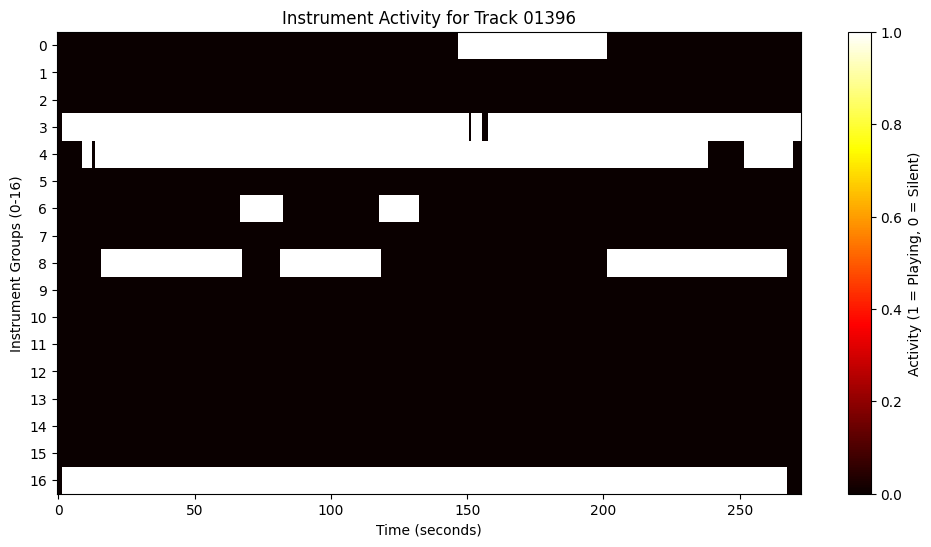

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os

def display_npy_track(track_id, directory="primary_labels_train"):
    track_str = str(track_id).zfill(5)
    npy_filename = os.path.join(directory, f"Track{track_str}.npy")
    
    if not os.path.exists(npy_filename):
        print(f"File {npy_filename} not found!")
        return
    
    # Load the matrix
    instrument_matrix = np.load(npy_filename)
    
    # Display the matrix
    plt.figure(figsize=(12, 6))
    plt.imshow(instrument_matrix, aspect='auto', cmap='hot', interpolation='nearest')
    plt.xlabel("Time (seconds)")
    plt.ylabel("Instrument Groups (0-16)")
    plt.title(f"Instrument Activity for Track {track_str}")
    plt.colorbar(label="Activity (1 = Playing, 0 = Silent)")
    plt.yticks(range(17))  # Ensure all instrument groups are labeled
    plt.show()

# Example usage:
display_npy_track(1396)